## Load ground truth

In [1]:
import pandas as pd

In [38]:

github_url = "https://github.com/DataTalksClub/llm-zoomcamp/blob/main/04-monitoring/data/results-gpt4o-mini.csv"
url = f'{github_url}?raw=1'
df = pd.read_csv(url)

In [39]:
df = df.iloc[:300]

## Index data

In [5]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [6]:
from sentence_transformers import SentenceTransformer

model_name = 'multi-qa-mpnet-base-dot-v1'
embedding_model = SentenceTransformer(model_name)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [40]:
answer_llm = df.iloc[0].answer_llm

answer_llm

'You can sign up for the course by visiting the course page at [http://mlzoomcamp.com/](http://mlzoomcamp.com/).'

In [41]:
embedding_model.encode(answer_llm)[0]

-0.42244664

In [42]:
df

,answer_llm,answer_orig,document,question,course
0,You can sign up for the course by visiting the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Where can I sign up for the course?,machine-learning-zoomcamp
1,You can sign up using the link provided in the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Can you provide a link to sign up?,machine-learning-zoomcamp
2,"Yes, there is an FAQ for the Machine Learning ...",Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Is there an FAQ for this Machine Learning course?,machine-learning-zoomcamp
3,The context does not provide any specific info...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Does this course have a GitHub repository for ...,machine-learning-zoomcamp
4,To structure your questions and answers for th...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,How can I structure my questions and answers f...,machine-learning-zoomcamp
...,...,...,...,...,...
295,An alternative way to load the data using the ...,Above users showed how to load the dataset dir...,8d209d6d,What is an alternative way to load the data us...,machine-learning-zoomcamp
296,You can directly download the dataset from Git...,Above users showed how to load the dataset dir...,8d209d6d,How can I directly download the dataset from G...,machine-learning-zoomcamp
297,You can fetch data for homework using the `req...,Above users showed how to load the dataset dir...,8d209d6d,Could you share a method to fetch data for hom...,machine-learning-zoomcamp
298,If the status code is 200 when downloading dat...,Above users showed how to load the dataset dir...,8d209d6d,What should I do if the status code is 200 whe...,machine-learning-zoomcamp


## Cosine similarity metric

In [43]:
df

,answer_llm,answer_orig,document,question,course
0,You can sign up for the course by visiting the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Where can I sign up for the course?,machine-learning-zoomcamp
1,You can sign up using the link provided in the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Can you provide a link to sign up?,machine-learning-zoomcamp
2,"Yes, there is an FAQ for the Machine Learning ...",Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Is there an FAQ for this Machine Learning course?,machine-learning-zoomcamp
3,The context does not provide any specific info...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Does this course have a GitHub repository for ...,machine-learning-zoomcamp
4,To structure your questions and answers for th...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,How can I structure my questions and answers f...,machine-learning-zoomcamp
...,...,...,...,...,...
295,An alternative way to load the data using the ...,Above users showed how to load the dataset dir...,8d209d6d,What is an alternative way to load the data us...,machine-learning-zoomcamp
296,You can directly download the dataset from Git...,Above users showed how to load the dataset dir...,8d209d6d,How can I directly download the dataset from G...,machine-learning-zoomcamp
297,You can fetch data for homework using the `req...,Above users showed how to load the dataset dir...,8d209d6d,Could you share a method to fetch data for hom...,machine-learning-zoomcamp
298,If the status code is 200 when downloading dat...,Above users showed how to load the dataset dir...,8d209d6d,What should I do if the status code is 200 whe...,machine-learning-zoomcamp


In [44]:
answer_orig = df["answer_orig"]
answer_llm = df["answer_llm"]

df["embedding_answer_orig"] = df.apply(lambda x: embedding_model.encode(x["answer_orig"]), axis=1)
df["embedding_answer_llm"] = df.apply(lambda x: embedding_model.encode(x["answer_llm"]), axis=1)

df["scores"] = df.apply(lambda x: x["embedding_answer_orig"].dot(x["embedding_answer_llm"]), axis=1)

df

,answer_llm,answer_orig,document,question,course,embedding_answer_orig,embedding_answer_llm,scores
0,You can sign up for the course by visiting the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Where can I sign up for the course?,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.42244664, -0.22485578, -0.3240585, -0.2847...",17.515997
1,You can sign up using the link provided in the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Can you provide a link to sign up?,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.38068172, 0.047848783, -0.31510988, -0.210...",13.418407
2,"Yes, there is an FAQ for the Machine Learning ...",Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Is there an FAQ for this Machine Learning course?,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.058813937, -0.3373696, -0.36157566, 0.0217...",25.313251
3,The context does not provide any specific info...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Does this course have a GitHub repository for ...,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.22753705, -0.008133715, -0.21719919, -0.11...",12.147419
4,To structure your questions and answers for th...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,How can I structure my questions and answers f...,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.0696938, -0.50050926, -0.16598442, 0.30666...",18.747730
...,...,...,...,...,...,...,...,...
295,An alternative way to load the data using the ...,Above users showed how to load the dataset dir...,8d209d6d,What is an alternative way to load the data us...,machine-learning-zoomcamp,"[-0.4539679, 0.109381735, -0.2475543, 0.171895...","[-0.21933001, 0.03642933, -0.22642463, 0.19385...",34.001778
296,You can directly download the dataset from Git...,Above users showed how to load the dataset dir...,8d209d6d,How can I directly download the dataset from G...,machine-learning-zoomcamp,"[-0.4539679, 0.109381735, -0.2475543, 0.171895...","[-0.46839637, 0.10411328, -0.19394615, 0.04033...",33.690865
297,You can fetch data for homework using the `req...,Above users showed how to load the dataset dir...,8d209d6d,Could you share a method to fetch data for hom...,machine-learning-zoomcamp,"[-0.4539679, 0.109381735, -0.2475543, 0.171895...","[-0.35566196, 0.11226927, -0.2843918, 0.062138...",34.491531
298,If the status code is 200 when downloading dat...,Above users showed how to load the dataset dir...,8d209d6d,What should I do if the status code is 200 whe...,machine-learning-zoomcamp,"[-0.4539679, 0.109381735, -0.2475543, 0.171895...","[-0.23460838, -0.11785706, -0.20596544, 0.0863...",27.538349


In [45]:
df["scores"].describe()

count    300.000000
mean      27.495996
std        6.384744
min        4.547924
25%       24.307846
50%       28.336859
75%       31.674308
max       39.476021
Name: scores, dtype: float64

In [46]:
import numpy as np

In [47]:
def norm_vector(v):
  norm = np.sqrt((v * v).sum())
  v_norm = v / norm
  return v_norm


df["embedding_answer_orig_norm"] = df.apply(lambda x: norm_vector(x["embedding_answer_orig"]), axis=1)
df["embedding_answer_llm_norm"] = df.apply(lambda x: norm_vector(x["embedding_answer_llm"]), axis=1)

df["scores_norm"] = df.apply(lambda x: x["embedding_answer_orig_norm"].dot(x["embedding_answer_llm_norm"]), axis=1)

df

,answer_llm,answer_orig,document,question,course,embedding_answer_orig,embedding_answer_llm,scores,embedding_answer_orig_norm,embedding_answer_llm_norm,scores_norm
0,You can sign up for the course by visiting the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Where can I sign up for the course?,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.42244664, -0.22485578, -0.3240585, -0.2847...",17.515997,"[-0.005158064, -0.058801822, -0.047931198, 0.0...","[-0.07159046, -0.038105473, -0.05491699, -0.04...",0.506754
1,You can sign up using the link provided in the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Can you provide a link to sign up?,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.38068172, 0.047848783, -0.31510988, -0.210...",13.418407,"[-0.005158064, -0.058801822, -0.047931198, 0.0...","[-0.064569525, 0.008115896, -0.053447526, -0.0...",0.388549
2,"Yes, there is an FAQ for the Machine Learning ...",Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Is there an FAQ for this Machine Learning course?,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.058813937, -0.3373696, -0.36157566, 0.0217...",25.313251,"[-0.005158064, -0.058801822, -0.047931198, 0.0...","[-0.009780019, -0.05610032, -0.060125485, 0.00...",0.718599
3,The context does not provide any specific info...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Does this course have a GitHub repository for ...,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.22753705, -0.008133715, -0.21719919, -0.11...",12.147419,"[-0.005158064, -0.058801822, -0.047931198, 0.0...","[-0.03700513, -0.0013228139, -0.035323847, -0....",0.337266
4,To structure your questions and answers for th...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,How can I structure my questions and answers f...,machine-learning-zoomcamp,"[-0.030213945, -0.34443834, -0.28076243, 0.061...","[-0.0696938, -0.50050926, -0.16598442, 0.30666...",18.747730,"[-0.005158064, -0.058801822, -0.047931198, 0.0...","[-0.011362236, -0.08159843, -0.027060574, 0.04...",0.521792
...,...,...,...,...,...,...,...,...,...,...,...
295,An alternative way to load the data using the ...,Above users showed how to load the dataset dir...,8d209d6d,What is an alternative way to load the data us...,machine-learning-zoomcamp,"[-0.4539679, 0.109381735, -0.2475543, 0.171895...","[-0.21933001, 0.03642933, -0.22642463, 0.19385...",34.001778,"[-0.07401224, 0.017832952, -0.04035979, 0.0280...","[-0.036169898, 0.0060075917, -0.037339877, 0.0...",0.914175
296,You can directly download the dataset from Git...,Above users showed how to load the dataset dir...,8d209d6d,How can I directly download the dataset from G...,machine-learning-zoomcamp,"[-0.4539679, 0.109381735, -0.2475543, 0.171895...","[-0.46839637, 0.10411328, -0.19394615, 0.04033...",33.690865,"[-0.07401224, 0.017832952, -0.04035979, 0.0280...","[-0.07693444, 0.01710068, -0.031855796, 0.0066...",0.902190
297,You can fetch data for homework using the `req...,Above users showed how to load the dataset dir...,8d209d6d,Could you share a method to fetch data for hom...,machine-learning-zoomcamp,"[-0.4539679, 0.109381735, -0.2475543, 0.171895...","[-0.35566196, 0.11226927, -0.2843918, 0.062138...",34.491531,"[-0.07401224, 0.017832952, -0.04035979, 0.0280...","[-0.057222553, 0.018063033, -0.045755874, 0.00...",0.904734
298,If the status code is 200 when downloading dat...,Above users showed how to load the dataset dir...,8d209d6d,What should I do if the status code is 200 whe...,machine-learning-zoomcamp,"[-0.4539679, 0.109381735, -0.2475543, 0.171895...","[-0.23460838, -0.11785706, -0.20596544, 0.0863...",27.538349,"[-0.07401224, 0.017832952, -0.04035979, 0.0280...","[-0.037977904, -0.019078448, -0.033341248, 0.0...",0.726781


In [48]:
df["scores_norm"].describe()

count    300.000000
mean       0.728392
std        0.157755
min        0.125357
25%        0.651273
50%        0.763761
75%        0.836235
max        0.958796
Name: scores_norm, dtype: float64

## Rouge

In [29]:
%pip install rouge

In [49]:
from rouge import Rouge
rouge_scorer = Rouge()

scores = rouge_scorer.get_scores(df['answer_llm'].iloc[10], df['answer_orig'].iloc[10])

In [50]:
scores

[{'rouge-1': {'r': 0.45454545454545453,
   'p': 0.45454545454545453,
   'f': 0.45454544954545456},
  'rouge-2': {'r': 0.21621621621621623,
   'p': 0.21621621621621623,
   'f': 0.21621621121621637},
  'rouge-l': {'r': 0.3939393939393939,
   'p': 0.3939393939393939,
   'f': 0.393939388939394}}]

In [ ]:
scores

In [51]:
scores_all = rouge_scorer.get_scores(df['answer_llm'], df['answer_orig'])
scores_all

[{'rouge-1': {'r': 0.061224489795918366,
   'p': 0.21428571428571427,
   'f': 0.09523809178130524},
  'rouge-2': {'r': 0.017543859649122806,
   'p': 0.07142857142857142,
   'f': 0.028169010918468917},
  'rouge-l': {'r': 0.061224489795918366,
   'p': 0.21428571428571427,
   'f': 0.09523809178130524}},
 {'rouge-1': {'r': 0.08163265306122448,
   'p': 0.26666666666666666,
   'f': 0.12499999641113292},
  'rouge-2': {'r': 0.03508771929824561,
   'p': 0.13333333333333333,
   'f': 0.05555555225694465},
  'rouge-l': {'r': 0.061224489795918366, 'p': 0.2, 'f': 0.09374999641113295}},
 {'rouge-1': {'r': 0.32653061224489793,
   'p': 0.5714285714285714,
   'f': 0.41558441095631643},
  'rouge-2': {'r': 0.14035087719298245,
   'p': 0.24242424242424243,
   'f': 0.17777777313333343},
  'rouge-l': {'r': 0.30612244897959184,
   'p': 0.5357142857142857,
   'f': 0.3896103849822905}},
 {'rouge-1': {'r': 0.16326530612244897, 'p': 0.32, 'f': 0.2162162117421476},
  'rouge-2': {'r': 0.03508771929824561,
   'p': 0

In [ ]:
pd.re

In [59]:
tmp_df = pd.DataFrame()


for result in scores_all:
  print(result)




{'rouge-1': {'r': 0.061224489795918366, 'p': 0.21428571428571427, 'f': 0.09523809178130524}, 'rouge-2': {'r': 0.017543859649122806, 'p': 0.07142857142857142, 'f': 0.028169010918468917}, 'rouge-l': {'r': 0.061224489795918366, 'p': 0.21428571428571427, 'f': 0.09523809178130524}}
{'rouge-1': {'r': 0.08163265306122448, 'p': 0.26666666666666666, 'f': 0.12499999641113292}, 'rouge-2': {'r': 0.03508771929824561, 'p': 0.13333333333333333, 'f': 0.05555555225694465}, 'rouge-l': {'r': 0.061224489795918366, 'p': 0.2, 'f': 0.09374999641113295}}
{'rouge-1': {'r': 0.32653061224489793, 'p': 0.5714285714285714, 'f': 0.41558441095631643}, 'rouge-2': {'r': 0.14035087719298245, 'p': 0.24242424242424243, 'f': 0.17777777313333343}, 'rouge-l': {'r': 0.30612244897959184, 'p': 0.5357142857142857, 'f': 0.3896103849822905}}
{'rouge-1': {'r': 0.16326530612244897, 'p': 0.32, 'f': 0.2162162117421476}, 'rouge-2': {'r': 0.03508771929824561, 'p': 0.07142857142857142, 'f': 0.047058819111419105}, 'rouge-l': {'r': 0.14285

In [66]:
f1_rouge_1 = []

def append_rouge(v):
  f1_rouge_1.append(v)

df_rouge["rouge-1"].apply(lambda x: append_rouge(x["f"]))

0      None
1      None
2      None
3      None
4      None
       ... 
295    None
296    None
297    None
298    None
299    None
Name: rouge-1, Length: 300, dtype: object

In [67]:
np.mean(f1_rouge_1)

0.3788436165774158

In [62]:
f1_rouge_2 = []

def append_rouge(v):
  f1_rouge_2.append(v)

df_rouge["rouge-2"].apply(lambda x: append_rouge(x["f"]))

0      None
1      None
2      None
3      None
4      None
       ... 
295    None
296    None
297    None
298    None
299    None
Name: rouge-2, Length: 300, dtype: object

In [65]:
np.mean(f1_rouge_2)

0.20696501983423318

In [ ]:
df_gpt4o_mini = pd.DataFrame(results_gpt4omini)
df_gpt4o_mini.to_csv('data/results-gpt4o-mini.csv', index=False)

In [ ]:
similarity_4o_mini = []

for record in tqdm(results_gpt4omini):
    sim = compute_similarity(record)
    similarity_4o_mini.append(sim)

  0%|          | 0/1830 [00:00<?, ?it/s]

In [ ]:
df_gpt4o_mini['cosine'] = similarity_4o_mini
df_gpt4o_mini['cosine'].describe()

count    1830.000000
mean        0.680332
std         0.215962
min        -0.141910
25%         0.585866
50%         0.733998
75%         0.836750
max         0.982701
Name: cosine, dtype: float64

gpt4o

```
count    1830.000000
mean        0.679129
std         0.217995
min        -0.153426
25%         0.591460
50%         0.734788
75%         0.835390
max         0.995339
Name: cosine, dtype: float64
```

C:\Users\alexe\AppData\Local\Temp\ipykernel_8108\4043211035.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt4o['cosine'], label='4o')
C:\Users\alexe\AppData\Local\Temp\ipykernel_8108\4043211035.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gpt4o_mini['cosine'], label='4o-mini'

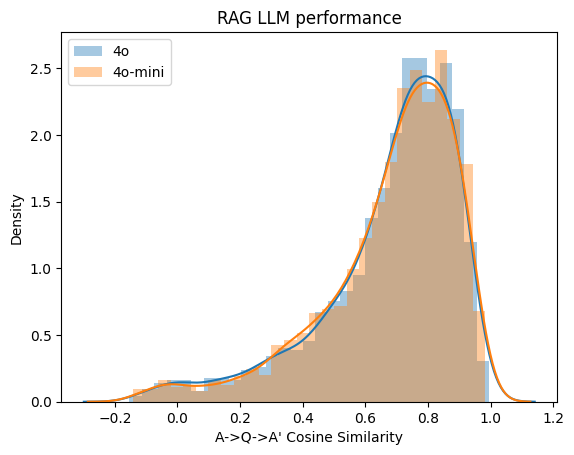

In [ ]:
# sns.distplot(df_gpt35['cosine'], label='3.5')

sns.distplot(df_gpt4o['cosine'], label='4o')
sns.distplot(df_gpt4o_mini['cosine'], label='4o-mini')

plt.title("RAG LLM performance")
plt.xlabel("A->Q->A' Cosine Similarity")
plt.legend()

## LLM-as-a-Judge

In [ ]:
prompt1_template = """
You are an expert evaluator for a Retrieval-Augmented Generation (RAG) system.
Your task is to analyze the relevance of the generated answer compared to the original answer provided.
Based on the relevance and similarity of the generated answer to the original answer, you will classify
it as "NON_RELEVANT", "PARTLY_RELEVANT", or "RELEVANT".

Here is the data for evaluation:

Original Answer: {answer_orig}
Generated Question: {question}
Generated Answer: {answer_llm}

Please analyze the content and context of the generated answer in relation to the original
answer and provide your evaluation in parsable JSON without using code blocks:

{{
  "Relevance": "NON_RELEVANT" | "PARTLY_RELEVANT" | "RELEVANT",
  "Explanation": "[Provide a brief explanation for your evaluation]"
}}
""".strip()

prompt2_template = """
You are an expert evaluator for a Retrieval-Augmented Generation (RAG) system.
Your task is to analyze the relevance of the generated answer to the given question.
Based on the relevance of the generated answer, you will classify it
as "NON_RELEVANT", "PARTLY_RELEVANT", or "RELEVANT".

Here is the data for evaluation:

Question: {question}
Generated Answer: {answer_llm}

Please analyze the content and context of the generated answer in relation to the question
and provide your evaluation in parsable JSON without using code blocks:

{{
  "Relevance": "NON_RELEVANT" | "PARTLY_RELEVANT" | "RELEVANT",
  "Explanation": "[Provide a brief explanation for your evaluation]"
}}
""".strip()

In [ ]:
df_sample = df_gpt4o_mini.sample(n=150, random_state=1)

In [ ]:
samples = df_sample.to_dict(orient='records')

In [ ]:
record = samples[0]
record

{'answer_llm': 'The syntax for using `precision_recall_fscore_support` in Python is as follows:\n\n```python\nfrom sklearn.metrics import precision_recall_fscore_support\nprecision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred, zero_division=0)\n```',
 'answer_orig': 'Scikit-learn offers another way: precision_recall_fscore_support\nExample:\nfrom sklearn.metrics import precision_recall_fscore_support\nprecision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred, zero_division=0)\n(Gopakumar Gopinathan)',
 'document': '403bbdd8',
 'question': 'What is the syntax for using precision_recall_fscore_support in Python?',
 'course': 'machine-learning-zoomcamp',
 'cosine': 0.9010756015777588}

In [ ]:
prompt = prompt1_template.format(**record)
print(prompt)

You are an expert evaluator for a Retrieval-Augmented Generation (RAG) system.
Your task is to analyze the relevance of the generated answer compared to the original answer provided.
Based on the relevance and similarity of the generated answer to the original answer, you will classify
it as "NON_RELEVANT", "PARTLY_RELEVANT", or "RELEVANT".

Here is the data for evaluation:

Original Answer: Scikit-learn offers another way: precision_recall_fscore_support
Example:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred, zero_division=0)
(Gopakumar Gopinathan)
Generated Question: What is the syntax for using precision_recall_fscore_support in Python?
Generated Answer: The syntax for using `precision_recall_fscore_support` in Python is as follows:

```python
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_

In [ ]:
answer = llm(prompt, model='gpt-4o-mini')

In [ ]:
import json

In [ ]:
evaluations = []

for record in tqdm(samples):
    prompt = prompt1_template.format(**record)
    evaluation = llm(prompt, model='gpt-4o-mini')
    evaluations.append(evaluation)

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
json_evaluations = []

for i, str_eval in enumerate(evaluations):
    json_eval = json.loads(str_eval)
    json_evaluations.append(json_eval)

In [ ]:
df_evaluations = pd.DataFrame(json_evaluations)

In [ ]:
df_evaluations.Relevance.value_counts()

Relevance
RELEVANT           124
PARTLY_RELEVANT     16
NON_RELEVANT        10
Name: count, dtype: int64

In [ ]:
df_evaluations[df_evaluations.Relevance == 'NON_RELEVANT'] #.to_dict(orient='records')

,Relevance,Explanation
4,NON_RELEVANT,The generated answer discusses a pip version e...
11,NON_RELEVANT,The generated answer does not address the spec...
27,NON_RELEVANT,The generated answer incorrectly states that t...
41,NON_RELEVANT,The generated answer provides information abou...
87,NON_RELEVANT,The generated answer does not address the orig...
90,NON_RELEVANT,The generated answer responds to a question ab...
93,NON_RELEVANT,The generated answer does not address the topi...
116,NON_RELEVANT,The generated answer discusses the recommended...
138,NON_RELEVANT,The generated answer addresses a different iss...
139,NON_RELEVANT,The generated answer does not relate to the to...


In [ ]:
sample[4]

{'answer_llm': "The cause of the pip version error in this week's serverless deep learning section could be a version conflict in Scikit-Learn. Specifically, if you are using a different version than what was used during the model training, it can lead to warnings and potential breaking code or invalid results. To resolve this, make sure to use the same version of Scikit-Learn that was used for training the model. For instance, if you trained with version 1.1.1, you should use that same version in your virtual environment.",
 'answer_orig': 'When running docker build -t dino-dragon-model it returns the above error\nThe most common source of this error in this week is because Alex video shows a version of the wheel with python 8, we need to find a wheel with the version that we are working on. In this case python 9. Another common error is to copy the link, this will also produce the same error, we need to download the raw format:\nhttps://github.com/alexeygrigorev/tflite-aws-lambda/raw

In [ ]:
prompt = prompt2_template.format(**record)
print(prompt)

You are an expert evaluator for a Retrieval-Augmented Generation (RAG) system.
Your task is to analyze the relevance of the generated answer to the given question.
Based on the relevance of the generated answer, you will classify it
as "NON_RELEVANT", "PARTLY_RELEVANT", or "RELEVANT".

Here is the data for evaluation:

Question: What modification was made to the median_house_value target in the homework?
Generated Answer: The modification made to the `median_house_value` target in the homework was that it was changed to binary format. The values were made discrete as either 0 or 1, instead of remaining as a continuous variable. This change was necessary for the calculation of the mutual information score, which is applicable to categorical or discrete variables rather than continuous ones.

Please analyze the content and context of the generated answer in relation to the question
and provide your evaluation in parsable JSON without using code blocks:

{
  "Relevance": "NON_RELEVANT" | 

In [ ]:
evaluation = llm(prompt, model='gpt-4o-mini')
print(evaluation)

{
  "Relevance": "RELEVANT",
  "Explanation": "The generated answer directly addresses the modification made to the `median_house_value` target by clarifying that it was changed to a binary format. It explains the significance of the change and its relation to the calculation of the mutual information score, which is pertinent to understanding the reasons behind the modification."
}


In [ ]:
evaluations_2 = []

for record in tqdm(samples):
    prompt = prompt2_template.format(**record)
    evaluation = llm(prompt, model='gpt-4o-mini')
    evaluations_2.append(evaluation)

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
json_evaluations_2 = []

for i, str_eval in enumerate(evaluations_2):
    json_eval = json.loads(str_eval)
    json_evaluations_2.append(json_eval)

In [ ]:
df_evaluations_2 = pd.DataFrame(json_evaluations_2)

In [ ]:
df_evaluations_2[df_evaluations_2.Relevance == 'NON_RELEVANT']

,Relevance,Explanation
45,NON_RELEVANT,The generated answer does not address the ques...
49,NON_RELEVANT,The generated answer explicitly states that th...
139,NON_RELEVANT,The generated answer provides information abou...


In [ ]:
samples[45]

{'answer_llm': 'The provided context does not include specific commands to start the Docker daemon on Linux. Therefore, I cannot provide an answer based solely on the facts from the context.',
 'answer_orig': 'Working on getting Docker installed - when I try running hello-world I am getting the error.\nDocker: Cannot connect to the docker daemon at unix:///var/run/docker.sock. Is the Docker daemon running ?\nSolution description\nIf you’re getting this error on WSL, re-install your docker: remove the docker installation from WSL and install Docker Desktop on your host machine (Windows).\nOn Linux, start the docker daemon with either of these commands:\nsudo dockerd\nsudo service docker start\nAdded by Ugochukwu Onyebuchi',
 'document': '4b2a3181',
 'question': 'What commands should I use to start the docker daemon on Linux?',
 'course': 'machine-learning-zoomcamp',
 'cosine': 0.51130211353302}

## Saving all the data

In [ ]:
df_gpt4o.to_csv('data/results-gpt4o-cosine.csv', index=False)
df_gpt35.to_csv('data/results-gpt35-cosine.csv', index=False)
df_gpt4o_mini.to_csv('data/results-gpt4o-mini-cosine.csv', index=False)

In [ ]:
df_evaluations.to_csv('data/evaluations-aqa.csv', index=False)
df_evaluations_2.to_csv('data/evaluations-qa.csv', index=False)